In [170]:
#importing the needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import re
import seaborn as sns
import os

### Introduction

### Datasets structure

####  - Global Indicators datasets:

1. Annual CO emissions (1751-2017) [global_co]
2. Annual greenhouse gas emissions (1990-2016) [global_ghg]
3. Global CO atmospheric concentration (800.000 BCE - 2018) [co_concentration]
4. Global Temperature Anomaly (1850-2018) [global_a]
5. Ozone-depleting emissions (1961-2014) [caused_ozone]
6. Antartica ozone hole area (1979-2018) [oz_hole]
7. Global average temperature (1850-2015) [annual_global_temp]
8. Fossil fuel consimpiton per capita (1965-2015) [fossil_per_c]
9. Primary energy consumption by source (1800-2018) [global_energy]
10. Modern renewable consumption (1965-2018) [renew_energy]
11. Hubbert's prediction on USA oil production (1991-2016) [hubbert_peak]
12. Share of global primary energy consumtion (1800-2017) [share_energy]
13. Solar PV price and capacity (1976-2018) [solar_price]

#### - Country indicators datasets:

14. CO annual emissions by country (1949-2017) [co_annual]
15. Annual share of CO emissions by country (1949-2017)[co_share]
16. Total greenhouse gas emissions by country (1990-2016) [ghg]
17. Average temperature by country (1743-2017)[annual_temp]

#### - Merged datasets:

18. Global indicators (1751-2018) [global_indicators]
19. Country indicators (1743-2017) [country_indicators]
20. Ozone datasets merged (1979-2014) [ozone_merged]

## Global Indicators

### 1. Annual CO emissions globally (1751-2017)

In [251]:
#importing Annual CO emissions globally
data = pd.read_csv('data//annual-co-emissions-by-region.csv')
data.head()

,Entity,Code,Year,Annual CO₂ emissions (tonnes )
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0


In [252]:
#keeping only the global data
global_co = data[data.Entity == 'World']
global_co.head()

,Entity,Code,Year,Annual CO₂ emissions (tonnes )
20353,World,OWID_WRL,1751,9350528.0
20354,World,OWID_WRL,1752,9354192.0
20355,World,OWID_WRL,1753,9354192.0
20356,World,OWID_WRL,1754,9357856.0
20357,World,OWID_WRL,1755,9361520.0


In [253]:
#cleaning the dataset
global_co.drop(['Entity','Code'], axis=1, inplace=True)

C:\Users\Andreu\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [254]:
global_co.set_index('Year',inplace=True)

In [255]:
global_co.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267 entries, 1751 to 2017
Data columns (total 1 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Annual CO₂ emissions (tonnes )  267 non-null    float64
dtypes: float64(1)
memory usage: 4.2 KB


###  2. Total greenhouse gas emissions (1990-2016)

In [256]:
#importing Total greenhouse gas emissions
ghg = pd.read_csv('data//total-ghg-emissions.csv')
ghg.head()

,Entity,Code,Year,Total GHG emissions including LUCF (tonnes CO₂e)
0,Afghanistan,AFG,1990,15140000.0
1,Afghanistan,AFG,1991,15060000.0
2,Afghanistan,AFG,1992,13600000.0
3,Afghanistan,AFG,1993,13430000.0
4,Afghanistan,AFG,1994,13240000.0


In [257]:
#cleaning the dataset
ghg.drop(['Code'], axis=1, inplace=True)

In [258]:
global_ghg = ghg[ghg.Entity == 'World']
global_ghg.head()

,Entity,Year,Total GHG emissions including LUCF (tonnes CO₂e)
5076,World,1990,3.496734e+10
5077,World,1991,3.512544e+10
5078,World,1992,3.498553e+10
5079,World,1993,3.507963e+10
5080,World,1994,3.528761e+10


In [259]:
global_ghg.drop(['Entity'], axis=1, inplace=True)

C:\Users\Andreu\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [260]:
global_ghg = global_ghg.rename(columns={'Total GHG emissions including LUCF (tonnes CO₂e)':'GHG(tonnes CO₂e )'})

In [261]:
global_ghg.set_index('Year',inplace=True)

In [262]:
global_ghg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 1990 to 2016
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GHG(tonnes CO₂e )  27 non-null     float64
dtypes: float64(1)
memory usage: 432.0 bytes


### 3. Global CO₂ atmospheric concentration

In [380]:
#importing Global CO₂ atmospheric concentration dataset
co_concentration = pd.read_csv('data//global-co-concentration-ppm.csv')
co_concentration

,Entity,Code,Year,CO₂ concentration (parts per million)
0,World,OWID_WRL,803719 BCE,207.29
1,World,OWID_WRL,803182 BCE,202.23
2,World,OWID_WRL,802573 BCE,204.86
3,World,OWID_WRL,802060 BCE,207.50
4,World,OWID_WRL,801975 BCE,202.92
...,...,...,...,...
1866,World,OWID_WRL,2014,398.65
1867,World,OWID_WRL,2015,400.83
1868,World,OWID_WRL,2016,404.24
1869,World,OWID_WRL,2017,406.55


In [381]:
#cleaning the data
co_concentration.drop(['Code', 'Entity'], axis=1, inplace=True)

In [382]:
co_concentration = co_concentration.rename(columns={'CO₂ concentration (parts per million)':'CO₂ concentration'})

In [392]:
co_concentration.Year[1648]

'1'

Text(0, 0.5, 'CO atmospheric concentration')

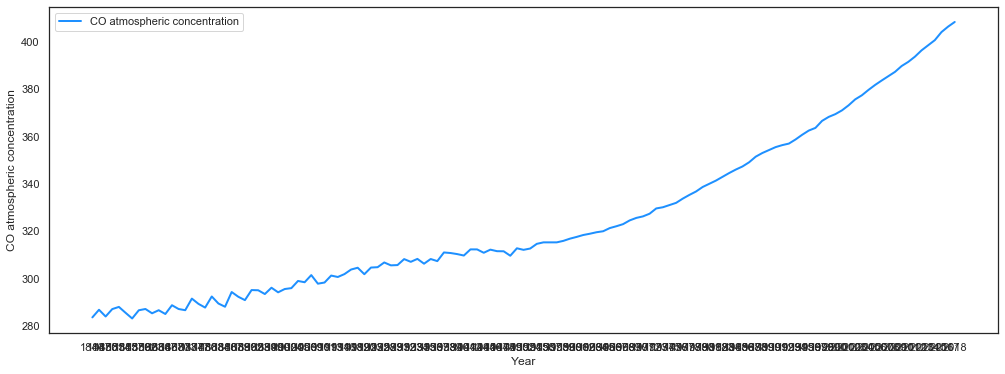

In [267]:
#plotting the Global CO₂ atmospheric concentration increasement from 1864-2018
x = co_concentration.Year[1740:]
y = co_concentration['CO₂ concentration'][1740:]
plt.figure(figsize=(17,6))

plt.plot(x, y, 'dodgerblue', label='CO atmospheric concentration', 
         linewidth=2)

plt.legend()
plt.xlabel('Year')
plt.ylabel('CO atmospheric concentration')

In [268]:
co_concentration.set_index('Year',inplace=True)

In [269]:
co_concentration.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1871 entries, 803719 BCE to 2018
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CO₂ concentration  1871 non-null   float64
dtypes: float64(1)
memory usage: 29.2+ KB


In [396]:
co_atm_conc = co_concentration.drop(co_concentration.index[:1648])

In [397]:
co_atm_conc.head()

,Year,CO₂ concentration
1648,1,276.7
1649,30,277.9
1650,56,277.4
1651,104,277.5
1652,136,278.1


In [398]:
co_atm_conc.to_csv('co_atm_conc')

### 4. Global Temperature anomaly 1850-2018


In [270]:
#importing Global Temperature anomaly (increase-decreage on previous average temperature)
temperature_a = pd.read_csv('data//temperature_anomaly.csv')
temperature_a.head()

,Entity,Code,Year,Median (℃),Upper (℃),Lower (℃)
0,Global,NaN,1850,-0.373,-0.339,-0.425
1,Global,NaN,1851,-0.218,-0.184,-0.274
2,Global,NaN,1852,-0.228,-0.196,-0.280
3,Global,NaN,1853,-0.269,-0.239,-0.321
4,Global,NaN,1854,-0.248,-0.218,-0.301


In [271]:
temperature_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Entity      676 non-null    object 
 1   Code        0 non-null      float64
 2   Year        676 non-null    int64  
 3   Median (℃)  676 non-null    float64
 4   Upper (℃)   676 non-null    float64
 5   Lower (℃)   676 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 31.8+ KB


In [272]:
#cleaning the dataset
temperature_a.drop(['Code'], axis=1, inplace=True)

In [273]:
temperature_a.rename(columns={'Entity':'Country'}, inplace=True)

In [274]:
temperature_a.Country.unique()

array(['Global', 'Northern Hemisphere', 'Southern Hemisphere', 'Tropics'],
      dtype=object)

In [494]:
#temperature_a.Year.unique()

Text(0, 0.5, 'increse ordescrease in Temperature(℃)')

C:\Users\Andreu\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8451 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Andreu\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8451 missing from current font.
  font.set_text(s, 0, flags=flags)


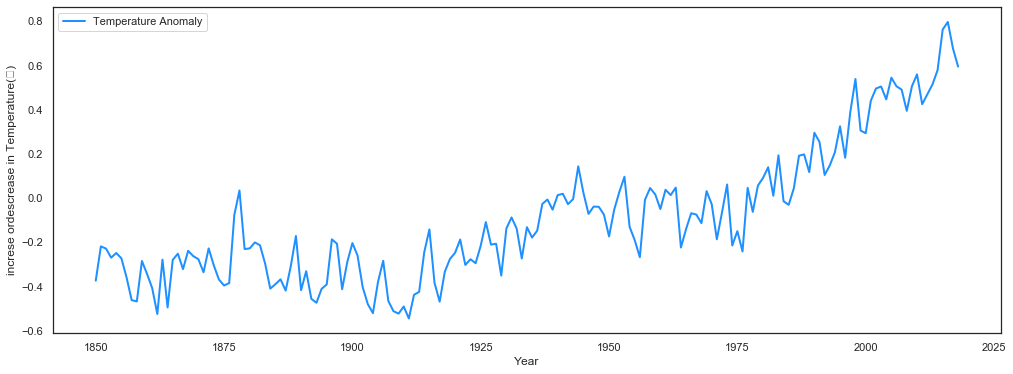

In [276]:
#plotting the median temperature anomaly over time to see how it's actually ingreasing 
x = temperature_a.Year
y = temperature_a['Median (℃)'].where(temperature_a['Country']=='Global')
plt.figure(figsize=(17,6))

plt.plot(x, y, 'dodgerblue', label='Temperature Anomaly', 
         linewidth=2)

plt.legend()
plt.xlabel('Year')
plt.ylabel('increse ordescrease in Temperature(℃)')

In [277]:
temperature_a.head()

,Country,Year,Median (℃),Upper (℃),Lower (℃)
0,Global,1850,-0.373,-0.339,-0.425
1,Global,1851,-0.218,-0.184,-0.274
2,Global,1852,-0.228,-0.196,-0.280
3,Global,1853,-0.269,-0.239,-0.321
4,Global,1854,-0.248,-0.218,-0.301


In [243]:
#keeping only the global data to compare it with the CO emissions and the CO concentration
global_a = temperature_a.where(temperature_a['Country']=='Global')
global_a.dropna(inplace=True)
global_a.drop(['Country'], axis=1, inplace=True)

In [278]:
global_a.set_index('Year',inplace=True)

In [360]:
global_a.drop(['Upper (℃)','Lower (℃)'],axis=1, inplace=True)

###  5. Ozone depletion substances emissions (CFC's) (1961-2014)

In [287]:
# importing Ozone depleting emissions dataset
ozone = pd.read_csv('data//ozone-depleting-substance-emissions.csv')
ozone.head()

,Entity,Code,Year,Ozone-depleting substance emissions (Scientific Assessment 2014) (tonnes CFC11-equivalents)
0,Natural emissions,NaN,1961,165000
1,Natural emissions,NaN,1962,165000
2,Natural emissions,NaN,1963,165000
3,Natural emissions,NaN,1964,165000
4,Natural emissions,NaN,1965,165000


In [288]:
# cleaning the dataset
ozone.drop(['Code'], axis=1, inplace=True)

In [289]:
ozone.rename(columns={'Ozone-depleting substance emissions (Scientific Assessment 2014) (tonnes CFC11-equivalents)':'Ozone-depleting emissions'}, inplace=True)

In [290]:
ozone.Entity.unique()

array(['Natural emissions', 'Total emissions'], dtype=object)

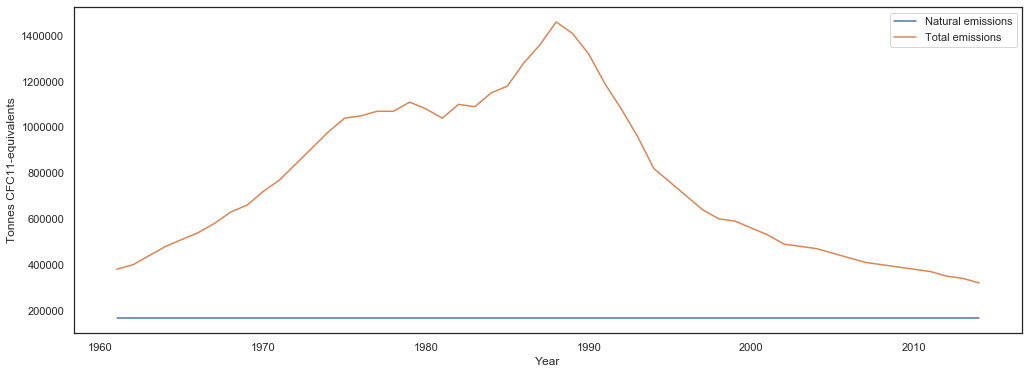

In [291]:
#ploting natural and total emissions to see that we have nearly stopped using CFC
plt.figure(figsize=(17,6))
plt.plot(ozone.Year,ozone['Ozone-depleting emissions'].where(ozone['Entity']=='Natural emissions'), label='Natural emissions')
plt.xlabel('Year')
plt.ylabel('Tonnes CFC11-equivalents')
plt.plot(ozone.Year, ozone['Ozone-depleting emissions'].where(ozone['Entity']=='Total emissions'), label='Total emissions')
plt.legend(['Natural emissions', 'Total emissions'], loc='upper right')

In [292]:
caused_ozone = ozone[ozone.Entity == 'Total emissions']
caused_ozone.drop(['Entity'],axis=1, inplace=True )

C:\Users\Andreu\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [294]:
ozone.set_index('Year',inplace=True)

In [293]:
caused_ozone.set_index('Year',inplace=True)

### 6. Antartica Ozone Hole area (1979-2017)

In [295]:
#importing Antartica Ozone Hole area dataset
oz_hole = pd.read_csv('data//antarctic-ozone-hole-area.csv')
oz_hole.head()

,Entity,Code,Year,Maximum ozone hole area (square kilometres),Mean ozone hole area (square kilometres)
0,World,OWID_WRL,1979,1100000,100000
1,World,OWID_WRL,1980,3300000,1400000
2,World,OWID_WRL,1981,3100000,600000
3,World,OWID_WRL,1982,10800000,4800000
4,World,OWID_WRL,1983,12200000,7900000


In [296]:
oz_hole.drop(['Entity', 'Code','Maximum ozone hole area (square kilometres)'], axis=1, inplace=True)

In [297]:
oz_hole.head()

,Year,Mean ozone hole area (square kilometres)
0,1979,100000
1,1980,1400000
2,1981,600000
3,1982,4800000
4,1983,7900000


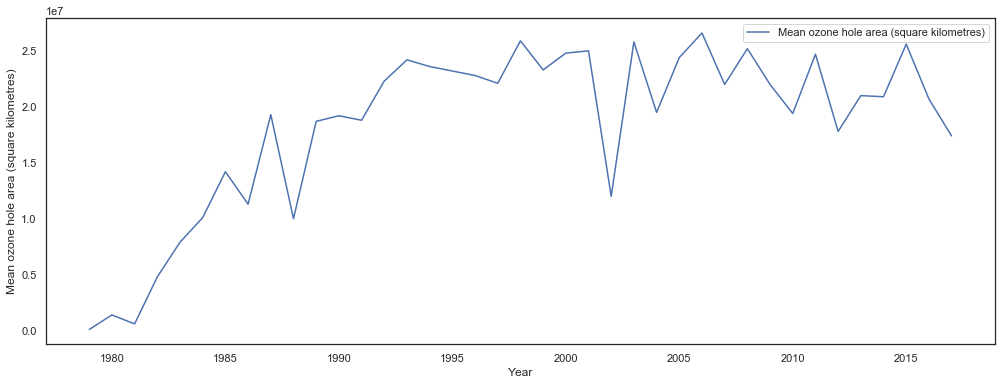

In [298]:
#ploting natural and total emissionsMean ozone hole area (square kilometres) to see if it has reduced
plt.figure(figsize=(17,6))
plt.plot(oz_hole.Year,oz_hole['Mean ozone hole area (square kilometres)'], label='Mean ozone hole area (square kilometres)')
plt.xlabel('Year')
plt.ylabel('Mean ozone hole area (square kilometres)')
plt.legend(['Mean ozone hole area (square kilometres)'], loc='upper right')

In [299]:
oz_hole.set_index('Year',inplace=True)

### 7. Global average temperature (1850-2015)

In [300]:
global_temperature = pd.read_csv('data//GlobalTemperatures.csv')
global_temperature.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [301]:
global_temperature.dropna(inplace=True)
global_temperature = global_temperature[['dt','LandAverageTemperature','LandAndOceanAverageTemperature']]
global_temperature.head()

,dt,LandAverageTemperature,LandAndOceanAverageTemperature
1200,1850-01-01,0.749,12.833
1201,1850-02-01,3.071,13.588
1202,1850-03-01,4.954,14.043
1203,1850-04-01,7.217,14.667
1204,1850-05-01,10.004,15.507


In [302]:
#global_temperature['dt']= pd.to_datetime(global_temperature['dt']) 
global_temperature['Year'] = pd.DatetimeIndex(global_temperature['dt']).year
global_temperature.head()

,dt,LandAverageTemperature,LandAndOceanAverageTemperature,Year
1200,1850-01-01,0.749,12.833,1850
1201,1850-02-01,3.071,13.588,1850
1202,1850-03-01,4.954,14.043,1850
1203,1850-04-01,7.217,14.667,1850
1204,1850-05-01,10.004,15.507,1850


In [303]:
annual_global_temp = global_temperature[['Year','LandAverageTemperature','LandAndOceanAverageTemperature']].groupby(['Year']).agg({'LandAverageTemperature':'mean',
                                                                                                                                  'LandAndOceanAverageTemperature':'mean'})
annual_global_temp.head()

,LandAverageTemperature,LandAndOceanAverageTemperature
Year,,
1850,7.900667,14.867167
1851,8.178583,14.991833
1852,8.100167,15.006500
1853,8.041833,14.955167
1854,8.210500,14.991000


In [304]:
annual_global_temp.reset_index(level=0, inplace=True)
annual_global_temp.head()

,Year,LandAverageTemperature,LandAndOceanAverageTemperature
0,1850,7.900667,14.867167
1,1851,8.178583,14.991833
2,1852,8.100167,15.006500
3,1853,8.041833,14.955167
4,1854,8.210500,14.991000


In [305]:
annual_global_temp.set_index('Year',inplace=True)

In [306]:
annual_global_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166 entries, 1850 to 2015
Data columns (total 2 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   LandAverageTemperature          166 non-null    float64
 1   LandAndOceanAverageTemperature  166 non-null    float64
dtypes: float64(2)
memory usage: 3.9 KB


### 8. Fossil fuel consumption per capita (1965-2015)

In [312]:
fossil_per_c = pd.read_csv('data//fossil-fuel-consumption-per-capita.csv')
fossil_per_c.head()

,Entity,Code,Year,Oil (megawatt-hours),Coal (megawatt-hours),Natural gas (megawatt-hours)
0,Africa,NaN,1965,0.982345,1.040686,0.032724
1,Africa,NaN,1966,1.050340,1.001970,0.035646
2,Africa,NaN,1967,1.014390,1.005197,0.034371
3,Africa,NaN,1968,1.043363,1.021139,0.034195
4,Africa,NaN,1969,1.032230,1.001083,0.039699


In [313]:
#keeping only the global data
fossil_per_c = fossil_per_c[fossil_per_c.Entity == 'World']
fossil_per_c.head()

,Entity,Code,Year,Oil (megawatt-hours),Coal (megawatt-hours),Natural gas (megawatt-hours)
3302,World,OWID_WRL,1965,5.312135,4.887554,2.043343
3303,World,OWID_WRL,1966,5.605541,4.845091,2.178977
3304,World,OWID_WRL,1967,5.883472,4.670063,2.288339
3305,World,OWID_WRL,1968,6.257357,4.643539,2.440440
3306,World,OWID_WRL,1969,6.655013,4.690820,2.622830


In [314]:
fossil_per_c.drop(['Entity', 'Code',], axis=1, inplace=True)

In [315]:
fossil_per_c.set_index('Year',inplace=True)

In [316]:
fossil_per_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 1965 to 2015
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Oil (megawatt-hours)          51 non-null     float64
 1   Coal (megawatt-hours)         51 non-null     float64
 2   Natural gas (megawatt-hours)  51 non-null     float64
dtypes: float64(3)
memory usage: 1.6 KB


### 9. Global primary energy by source (1800-2018)

In [317]:
global_energy = pd.read_csv('data//global-primary-energy.csv')
global_energy.head()

,Entity,Code,Year,Coal (terawatt-hours),Solar (terawatt-hours),Crude oil (terawatt-hours),Natural gas (terawatt-hours),Traditional biofuels (terawatt-hours),Other renewables (terawatt-hours),Hydropower (terawatt-hours),Nuclear (terawatt-hours),Wind (terawatt-hours)
0,World,OWID_WRL,1800,97.22230,0.0,0.0,0.0,5555.555556,0.0,0.0,0.0,0.0
1,World,OWID_WRL,1810,127.77788,0.0,0.0,0.0,5833.333333,0.0,0.0,0.0,0.0
2,World,OWID_WRL,1820,152.77790,0.0,0.0,0.0,6111.111111,0.0,0.0,0.0,0.0
3,World,OWID_WRL,1830,263.88910,0.0,0.0,0.0,6388.888889,0.0,0.0,0.0,0.0
4,World,OWID_WRL,1840,355.55584,0.0,0.0,0.0,6944.444444,0.0,0.0,0.0,0.0


In [318]:
global_energy.drop(['Entity', 'Code',], axis=1, inplace=True)

In [319]:
global_energy.set_index('Year',inplace=True)

In [320]:
global_energy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71 entries, 1800 to 2018
Data columns (total 9 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Coal (terawatt-hours)                  71 non-null     float64
 1   Solar (terawatt-hours)                 71 non-null     float64
 2   Crude oil (terawatt-hours)             71 non-null     float64
 3   Natural gas (terawatt-hours)           71 non-null     float64
 4   Traditional biofuels (terawatt-hours)  71 non-null     float64
 5   Other renewables (terawatt-hours)      71 non-null     float64
 6   Hydropower (terawatt-hours)            71 non-null     float64
 7   Nuclear (terawatt-hours)               71 non-null     float64
 8   Wind (terawatt-hours)                  71 non-null     float64
dtypes: float64(9)
memory usage: 5.5 KB


### 10. Modern renewable energy consumtion (1965-2018)

In [321]:
renew_energy = pd.read_csv('data//modern-renewable-energy-consumption.csv')
renew_energy.head()

,Entity,Code,Year,Hydropower (terawatt-hours),Solar (terawatt-hours),Wind (terawatt-hours),Other renewables (terawatt-hours)
0,Africa,NaN,1965,14.278806,0.0,0.0,0.0
1,Africa,NaN,1966,15.649049,0.0,0.0,0.0
2,Africa,NaN,1967,16.158333,0.0,0.0,0.0
3,Africa,NaN,1968,18.622983,0.0,0.0,0.0
4,Africa,NaN,1969,21.582897,0.0,0.0,0.0


In [322]:
#keeping only the global data
renew_energy = renew_energy[renew_energy.Entity == 'World']
renew_energy.head()

,Entity,Code,Year,Hydropower (terawatt-hours),Solar (terawatt-hours),Wind (terawatt-hours),Other renewables (terawatt-hours)
5037,World,OWID_WRL,1965,919.770276,0.0,0.0,17.985232
5038,World,OWID_WRL,1966,986.285872,0.0,0.0,19.806007
5039,World,OWID_WRL,1967,1009.244569,0.0,0.0,19.986571
5040,World,OWID_WRL,1968,1059.062860,0.0,0.0,22.120045
5041,World,OWID_WRL,1969,1122.442526,0.0,0.0,23.257964


In [323]:
renew_energy.drop(['Entity', 'Code',], axis=1, inplace=True)

In [324]:
renew_energy.set_index('Year',inplace=True)

In [325]:
renew_energy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54 entries, 1965 to 2018
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Hydropower (terawatt-hours)        54 non-null     float64
 1   Solar (terawatt-hours)             54 non-null     float64
 2   Wind (terawatt-hours)              54 non-null     float64
 3   Other renewables (terawatt-hours)  54 non-null     float64
dtypes: float64(4)
memory usage: 2.1 KB


### 11. Hubbert's peak vs actual oil production (1911-2016)

In [133]:
hubbert_peak = pd.read_csv('data//hubberts-peak-vs-actual-oil-production-in-the-united-states.csv')
hubbert_peak.head()

,Entity,Code,Year,(barrels per year),(barrels per year).1
0,United States,USA,1910,209557000.0,NaN
1,United States,USA,1911,220449000.0,200158958.0
2,United States,USA,1912,222935000.0,213834803.7
3,United States,USA,1913,248446000.0,228406784.8
4,United States,USA,1914,265763000.0,243928136.8


In [142]:
hubbert_peak.columns

Index(['Entity', 'Code', 'Year', ' (barrels per year)',
       ' (barrels per year).1'],
      dtype='object')

In [156]:
hubbert_peak.drop(['Entity', 'Code'], axis=1, inplace=True)

In [326]:
hubbert_peak.rename(columns={' (barrels per year)':'Actual Oil Prod',' (barrels per year).1':'Hubbert Predicted'}, inplace=True)

In [327]:
hubbert_peak = hubbert_peak.dropna()

In [328]:
hubbert_peak.tail()

,Year,Actual,Predicted
102,2012,2.374136e+09,614194532.6
103,2013,2.725665e+09,577668428.7
104,2014,3.198694e+09,543068744.5
105,2015,3.436515e+09,510324290.7
106,2016,3.248117e+09,479362510.8


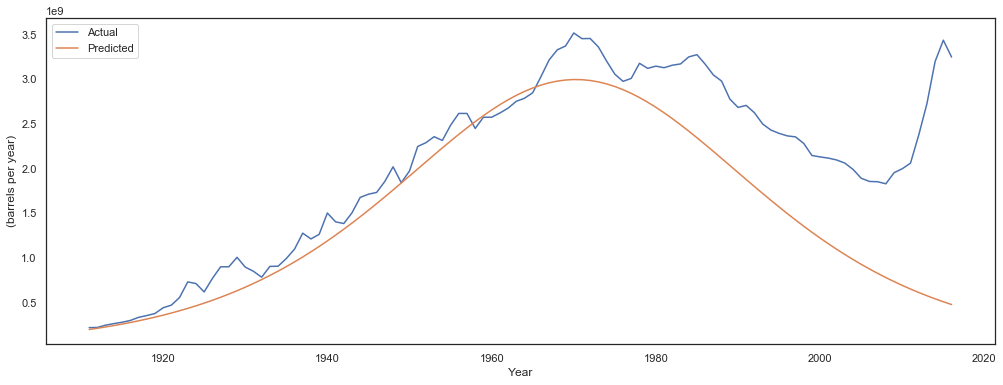

In [329]:
#ploting predicted and actual emissions to see if it the prediction came true
plt.figure(figsize=(17,6))
plt.plot(hubbert_peak.Year,hubbert_peak['Actual'],label='Actual')
plt.xlabel('Year')
plt.ylabel('(barrels per year)')
plt.plot(hubbert_peak.Year,hubbert_peak['Predicted'],label='Predicted')
plt.legend(['Actual', 'Predicted'], loc='upper left')

In [330]:
hubbert_peak.set_index('Year',inplace=True)

In [331]:
hubbert_peak.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106 entries, 1911 to 2016
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Actual     106 non-null    float64
 1   Predicted  106 non-null    float64
dtypes: float64(2)
memory usage: 2.5 KB


### 12. Share of global primary energy (1800-2017)

In [332]:
share_energy = pd.read_csv('data//global-primary-energy-share-inc-biomass.csv')
share_energy.head()

,Entity,Code,Year,Coal (%),Crude oil (%),Hydropower (%),Natural gas (%),Nuclear (%),Other renewables (%),Solar (%),Traditional biofuels (%),Wind (%)
0,World,OWID_WRL,1800,1.719903,0.0,0.0,0.0,0.0,0.0,0.0,98.280097,0.0
1,World,OWID_WRL,1810,2.143525,0.0,0.0,0.0,0.0,0.0,0.0,97.856475,0.0
2,World,OWID_WRL,1820,2.439026,0.0,0.0,0.0,0.0,0.0,0.0,97.560974,0.0
3,World,OWID_WRL,1830,3.966600,0.0,0.0,0.0,0.0,0.0,0.0,96.033400,0.0
4,World,OWID_WRL,1840,4.870628,0.0,0.0,0.0,0.0,0.0,0.0,95.129372,0.0


In [333]:
share_energy.drop(['Entity', 'Code'], axis=1, inplace=True)

In [334]:
share_energy.set_index('Year',inplace=True)

In [335]:
share_energy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70 entries, 1800 to 2017
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Coal (%)                  70 non-null     float64
 1   Crude oil (%)             70 non-null     float64
 2   Hydropower (%)            70 non-null     float64
 3   Natural gas (%)           70 non-null     float64
 4   Nuclear (%)               70 non-null     float64
 5   Other renewables (%)      70 non-null     float64
 6   Solar (%)                 70 non-null     float64
 7   Traditional biofuels (%)  70 non-null     float64
 8   Wind (%)                  70 non-null     float64
dtypes: float64(9)
memory usage: 5.5 KB


### 13. Solar pannels price progression (1976-2016)

In [464]:
solar_price = pd.read_csv('data//solar-pv-prices-vs-cumulative-capacity.csv')
solar_price.head()

,Entity,Code,Year,Solar PV Module Cost (2016 $ per watt-peak (2016 $/Wp)),Cumulative Installed Capacity (megawatts-peak (MWp)),Total population (Gapminder)
0,Afghanistan,AFG,1800,NaN,NaN,3280000.0
1,Afghanistan,AFG,1820,NaN,NaN,3280000.0
2,Afghanistan,AFG,1870,NaN,NaN,4207000.0
3,Afghanistan,AFG,1913,NaN,NaN,5730000.0
4,Afghanistan,AFG,1950,NaN,NaN,8151455.0


In [465]:
#keeping only the global data
solar_price = solar_price[solar_price.Entity == 'World']
solar_price.head()

,Entity,Code,Year,Solar PV Module Cost (2016 $ per watt-peak (2016 $/Wp)),Cumulative Installed Capacity (megawatts-peak (MWp)),Total population (Gapminder)
19946,World,OWID_WRL,1976,66.104835,0.32,NaN
19947,World,OWID_WRL,1977,46.440539,0.77,NaN
19948,World,OWID_WRL,1978,33.282688,1.77,NaN
19949,World,OWID_WRL,1979,29.692493,3.27,NaN
19950,World,OWID_WRL,1980,23.755361,6.57,NaN


In [466]:
solar_price.drop(['Entity', 'Code','Total population (Gapminder)'], axis=1, inplace=True)

In [467]:
solar_price.rename(columns={'Solar PV Module Cost (2016 $ per watt-peak (2016 $/Wp))':'Solar PV Module Cost($/Wp)','Cumulative Installed Capacity (megawatts-peak (MWp))':'Cumulative Installed Capacity(MWp)'}, inplace=True)

In [468]:
#solar_price.set_index('Cumulative Installed Capacity(MWp)',inplace=True)

Text(0, 0.5, 'Solar PV Module Cost($/Wp)')

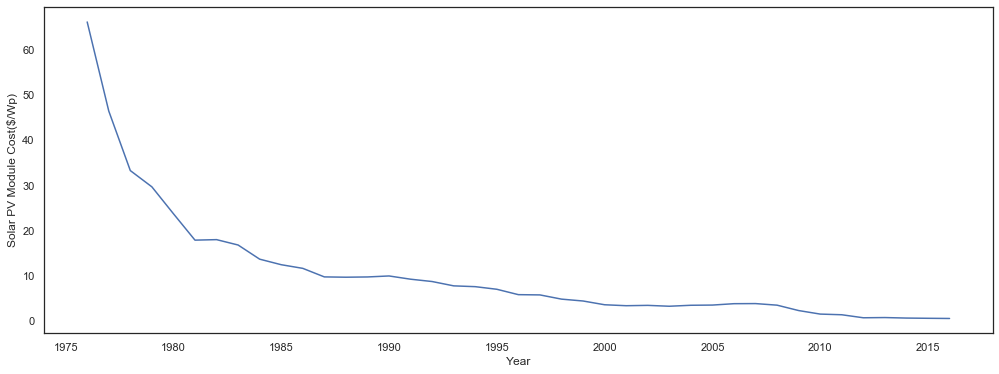

In [471]:
plt.figure(figsize=(17,6))
plt.plot(solar_price.Year,solar_price['Solar PV Module Cost($/Wp)'],label='Solar PV Module Cost($/Wp)')
plt.xlabel('Year')
plt.ylabel('Solar PV Module Cost($/Wp)')


Text(0, 0.5, 'Cumulative Installed Capacity(MWp)')

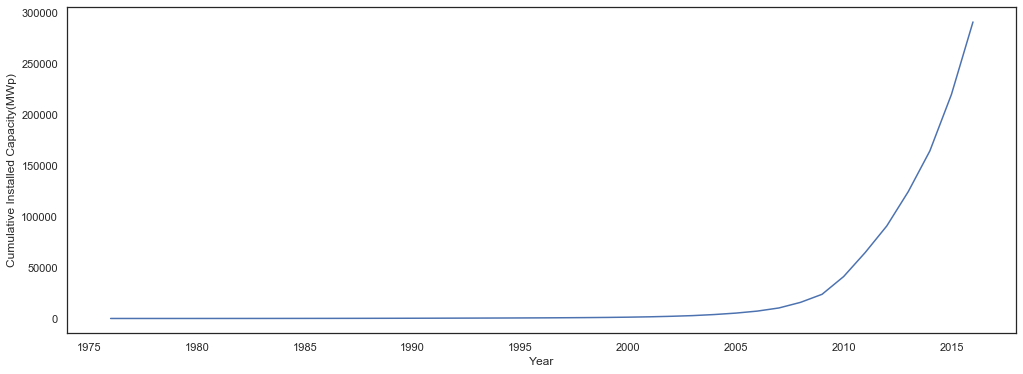

In [472]:
plt.figure(figsize=(17,6))
plt.plot(solar_price.Year,solar_price['Cumulative Installed Capacity(MWp)'],label='Cumulative Installed Capacity(MWp)')
plt.xlabel('Year')
plt.ylabel('Cumulative Installed Capacity(MWp)')

## Country Indicators

### 14. CO annual emissions (1949-2017)

In [475]:
#importing Annual CO per country (1949-2017)
co_annual = pd.read_csv('data//annual_co2_emissions_per_country.csv')
co_annual.head()

,Entity,Code,Year,Annual CO₂ emissions (tonnes)
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0


In [477]:
#cleaning the dataset
co_annual.drop(['Code'], axis=1, inplace=True)
co_annual = co_annual.rename(columns={'Annual CO₂ emissions (tonnes)':'Annual CO₂', 'Entity':'Country'})

In [478]:
#keeping only Country indicators
co_annual = co_annual[co_annual.Country != 'World']
#co_annual.Year.unique()
co_annual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20586 entries, 0 to 20852
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     20586 non-null  object 
 1   Year        20586 non-null  int64  
 2   Annual CO₂  20586 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 643.3+ KB


### 15. Annual share of CO per country (1949-2017)

In [479]:
#importing Annual share of CO per country (1949-2017)
co_share = pd.read_csv('data//annual_share_of_co2_emissions.csv')
co_share.head()

,Entity,Code,Year,Share of global CO₂ emissions (%)
0,Afghanistan,AFG,1949,0.0003
1,Afghanistan,AFG,1950,0.0015
2,Afghanistan,AFG,1951,0.0015
3,Afghanistan,AFG,1952,0.0015
4,Afghanistan,AFG,1953,0.0016


In [480]:
#cleaning the data set
co_share.drop(['Code'], axis=1, inplace=True)

co_share = co_share.rename(columns={'Share of global CO₂ emissions (%)b':'Annual CO₂', 'Entity':'Country'})

co_share.Year.unique()

co_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20586 entries, 0 to 20585
Data columns (total 3 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country                            20586 non-null  object 
 1   Year                               20586 non-null  int64  
 2   Share of global CO₂ emissions (%)  20586 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 482.6+ KB


###  16. Total greenhouse gas emissions (1990-2016)

In [520]:
#importing Total greenhouse gas emissions
ghg = pd.read_csv('data//total-ghg-emissions.csv')
ghg.head()

,Entity,Code,Year,Total GHG emissions including LUCF (tonnes CO₂e)
0,Afghanistan,AFG,1990,15140000.0
1,Afghanistan,AFG,1991,15060000.0
2,Afghanistan,AFG,1992,13600000.0
3,Afghanistan,AFG,1993,13430000.0
4,Afghanistan,AFG,1994,13240000.0


In [521]:
#cleaning the dataset
ghg.drop(['Code'], axis=1, inplace=True)

ghg = ghg.rename(columns={'Total GHG emissions including LUCF (tonnes CO₂e)':'GHG(tonnes CO₂e )', 'Entity':'Country'})
#keeping only Country indicators
ghg = ghg[ghg.Country != 'World']
ghg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5157 entries, 0 to 5183
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            5157 non-null   object 
 1   Year               5157 non-null   int64  
 2   GHG(tonnes CO₂e )  5157 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 161.2+ KB


### 17. Average temperatures by country (1743-2013)

In [487]:
#importing Global temperatures by country data set
temperature = pd.read_csv('data//GlobalLandTemperaturesByCountry.csv')
temperature.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [488]:
#cleaning the dataset
temperature['dt']= pd.to_datetime(temperature['dt']) 

temperature['Year'] = pd.DatetimeIndex(temperature['dt']).year
temperature.head()

#keeping only the desired countries, and removing regions
non_wanted = ['Åland','Africa','Asia','Baker Island','Denmark','Federated States Of Micronesia','France', 'French Guiana', 'French Polynesia',
            'French Southern And Antarctic Lands','Gaza Strip','Guadeloupe', 'Guam','Guernsey','Heard Island And Mcdonald Islands','Isle Of Man','Jersey','Kingman Reef',
             'Montserrat','Netherlands (Europe)','Niue','North America','New Caledonia','Northern Mariana Islands','Oceania',
             'Palmyra Atoll','Saint Barthélemy','American Samoa','South America','South Georgia And The South Sandwich Isla',
             'Svalbard And Jan Mayen','Turks And Caicas Islands','United Kingdom','Western Sahara']
for region in non_wanted:
    temperature = temperature[temperature.Country != region]

In [489]:
#grouping by year and agregating the mean so we have the annual mean temperature by country
annual_temp = temperature[['Year', 'Country','AverageTemperature']].groupby(['Year','Country']).agg({'AverageTemperature':'mean'})

#reseting index to adapt it for the future merge
annual_temp.reset_index(level=0, inplace=True)

annual_temp.head()


,Year,AverageTemperature
Country,,
Albania,1743,8.620
Andorra,1743,7.556
Austria,1743,2.482
Belarus,1743,0.767
Belgium,1743,7.106


In [491]:
#one more reset to have country as a column
annual_temp.reset_index(level=0, inplace=True)
annual_temp.head()

,index,Country,Year,AverageTemperature
0,0,Albania,1743,8.620
1,1,Andorra,1743,7.556
2,2,Austria,1743,2.482
3,3,Belarus,1743,0.767
4,4,Belgium,1743,7.106


In [493]:
annual_temp.drop(['index'], axis=1, inplace=True)
annual_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41931 entries, 0 to 41930
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             41931 non-null  object 
 1   Year                41931 non-null  int64  
 2   AverageTemperature  39793 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 982.9+ KB


## Merging datasets

### 18. Merging global indicators

In [362]:
#datasets 1 and 2
global_indicators1 = pd.merge(global_co, global_ghg, on='Year', how='outer')

In [365]:
#datasets 1,2,4
global_indicators2 = pd.merge(global_indicators1,global_a, on='Year', how='outer')

In [366]:
#datasets 1,2,4,5
global_indicators3 = pd.merge(global_indicators2,caused_ozone, on='Year', how='outer')

In [367]:
#datasets 1,2,4,5,6
global_indicators4 = pd.merge(global_indicators3,oz_hole, on='Year', how='outer')

In [368]:
#datasets 1,2,4,5,6,7
global_indicators5 = pd.merge(global_indicators4,annual_global_temp, on='Year', how='outer')

In [369]:
#datasets 1,2,4,5,6,7,8
global_indicators6 = pd.merge(global_indicators5,fossil_per_c, on='Year', how='outer')

In [370]:
#datasets 1,2,4,5,6,7,8,9
global_indicators7 = pd.merge(global_indicators6,global_energy, on='Year', how='outer')

In [371]:
#datasets 1,2,4,5,6,7,8,9,10
global_indicators8 = pd.merge(global_indicators7,renew_energy, on='Year', how='outer')

In [372]:
#datasets 1,2,4,5,6,7,8,9,10,12
global_indicators = pd.merge(global_indicators8,share_energy, on='Year', how='outer')

In [504]:
global_indicators.tail()

,Annual CO₂ emissions (tonnes ),GHG(tonnes CO₂e ),Median (℃),Ozone-depleting emissions,Mean ozone hole area (square kilometres),LandAverageTemperature,LandAndOceanAverageTemperature,Oil (megawatt-hours),Coal (megawatt-hours),Natural gas (megawatt-hours),...,Other renewables (terawatt-hours)_y,Coal (%),Crude oil (%),Hydropower (%),Natural gas (%),Nuclear (%),Other renewables (%),Solar (%),Traditional biofuels (%),Wind (%)
Year,,,,,,,,,,,,,,,,,,,,,
2014,3.550583e+10,4.944079e+10,0.579,320000.0,20900000.0,9.570667,15.913000,6.780018,6.197751,4.896768,...,502.158919,30.129928,34.284243,2.607999,22.798160,1.704505,0.338342,0.132597,7.526348,0.477878
2015,3.546275e+10,4.985498e+10,0.763,NaN,25600000.0,9.831000,16.058583,6.838042,5.961733,4.956876,...,536.466244,29.232112,34.750780,2.597906,23.193692,1.719514,0.359307,0.173580,7.417781,0.555327
2016,3.567510e+10,4.935803e+10,0.797,NaN,20700000.0,NaN,NaN,NaN,NaN,NaN,...,556.623356,28.479418,35.021326,2.666862,23.616645,1.726446,0.368032,0.216849,7.270446,0.633975
2017,3.615326e+10,NaN,0.677,NaN,17400000.0,NaN,NaN,NaN,NaN,NaN,...,584.975827,28.254141,34.995960,2.643218,23.896486,1.715909,0.381633,0.288171,7.093508,0.730975
2018,NaN,NaN,0.595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,625.805362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [375]:
global_indicators.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268 entries, 1751 to 2018
Data columns (total 32 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Annual CO₂ emissions (tonnes )            267 non-null    float64
 1   GHG(tonnes CO₂e )                         27 non-null     float64
 2   Median (℃)                                169 non-null    float64
 3   Ozone-depleting emissions                 54 non-null     float64
 4   Mean ozone hole area (square kilometres)  38 non-null     float64
 5   LandAverageTemperature                    166 non-null    float64
 6   LandAndOceanAverageTemperature            166 non-null    float64
 7   Oil (megawatt-hours)                      51 non-null     float64
 8   Coal (megawatt-hours)                     51 non-null     float64
 9   Natural gas (megawatt-hours)              51 non-null     float64
 10  Coal (terawatt-hours)             

In [376]:
global_indicators.to_csv('global_indicators')

### 19. Merging country indicators

In [523]:
#datasets 1 and 2
country_indicators1 = pd.merge(co_annual, co_share, on=['Year', 'Country'], how='outer')
country_indicators1.head()

,Country,Year,Annual CO₂,Share of global CO₂ emissions (%)
0,Afghanistan,1949,14656.0,0.0003
1,Afghanistan,1950,84272.0,0.0015
2,Afghanistan,1951,91600.0,0.0015
3,Afghanistan,1952,91600.0,0.0015
4,Afghanistan,1953,106256.0,0.0016


In [524]:
country_indicators2 = pd.merge(country_indicators1, ghg, on=['Year', 'Country'], how='outer')

In [527]:
country_indicators = pd.merge(country_indicators2, annual_temp, on=['Year', 'Country'], how='outer' )

In [528]:
country_indicators.head()

,Country,Year,Annual CO₂,Share of global CO₂ emissions (%),GHG(tonnes CO₂e ),AverageTemperature
0,Afghanistan,1949,14656.0,0.0003,NaN,13.350083
1,Afghanistan,1950,84272.0,0.0015,NaN,13.043500
2,Afghanistan,1951,91600.0,0.0015,NaN,13.967750
3,Afghanistan,1952,91600.0,0.0015,NaN,14.175417
4,Afghanistan,1953,106256.0,0.0016,NaN,14.650750


In [529]:
country_indicators.head().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country                            5 non-null      object 
 1   Year                               5 non-null      int64  
 2   Annual CO₂                         5 non-null      float64
 3   Share of global CO₂ emissions (%)  5 non-null      float64
 4   GHG(tonnes CO₂e )                  0 non-null      float64
 5   AverageTemperature                 5 non-null      float64
dtypes: float64(4), int64(1), object(1)
memory usage: 280.0+ bytes


### 20. Merging ozone datasets 1979-2014

In [530]:
ozone_merged = pd.merge(caused_ozone, oz_hole, on='Year')
ozone_merged.head()

,Ozone-depleting emissions,Mean ozone hole area (square kilometres)
Year,,
1979,1110000,100000
1980,1080000,1400000
1981,1040000,600000
1982,1100000,4800000
1983,1090000,7900000


In [531]:
oz_hole_emiss_corr = ozone_merged["Ozone-depleting emissions"].corr(ozone_merged["Mean ozone hole area (square kilometres)"])
oz_hole_emiss_corr

-0.5597422292909034

In [532]:
ozone_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 1979 to 2014
Data columns (total 2 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   Ozone-depleting emissions                 35 non-null     int64
 1   Mean ozone hole area (square kilometres)  35 non-null     int64
dtypes: int64(2)
memory usage: 840.0 bytes


In [540]:
ozone_merged.tail()

,Ozone-depleting emissions,Mean ozone hole area (square kilometres)
Year,,
2010,380000,19400000
2011,370000,24700000
2012,350000,17800000
2013,340000,21000000
2014,320000,20900000


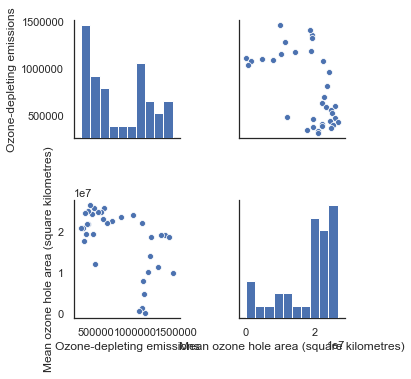

In [534]:
sns.pairplot(ozone_merged)

### CO emissions and median temperature anomaly correlation

In [444]:
co_a_corr = global_indicators["Median (℃)"].corr(global_indicators["Annual CO₂ emissions (tonnes )"])
co_a_corr

0.890288126134981

Text(0, 0.5, 'Median (℃)')

C:\Users\Andreu\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8322 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Andreu\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8322 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Andreu\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8451 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Andreu\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8451 missing from current font.
  font.set_text(s, 0, flags=flags)


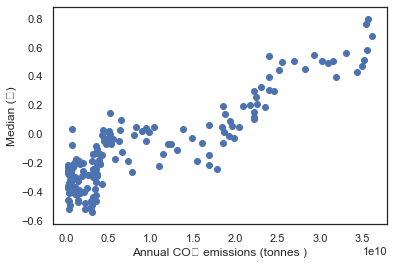

In [538]:
plt.scatter(x=global_indicators['Annual CO₂ emissions (tonnes )'], y=global_indicators['Median (℃)'])
plt.xlabel('Annual CO₂ emissions (tonnes )')
plt.ylabel('Median (℃)')